<a href="https://colab.research.google.com/github/afzal7277/cat_dog_classification/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [4]:
# configuring the path of kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod ~/.kaggle/kaggle.json

chmod: missing operand after ‘/root/.kaggle/kaggle.json’
Try 'chmod --help' for more information.


In [5]:
# downloading the dataset using api token

!kaggle datasets download -d tongpython/cat-and-dog

 99% 216M/218M [00:01<00:00, 218MB/s]
100% 218M/218M [00:01<00:00, 208MB/s]


In [6]:
# Extracting the zip file
from zipfile import ZipFile

dataset = '/content/cat-and-dog.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("File is extracted")


File is extracted


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [2]:
path = '/content/training_set/training_set/cats/'
train_cat_img = [i for i in os.listdir(path) if os.path.isfile(path + i)]
print(train_cat_img[0:5])
print(train_cat_img[-5:])

['cat.3087.jpg', 'cat.2299.jpg', 'cat.274.jpg', 'cat.1334.jpg', 'cat.1425.jpg']
['cat.581.jpg', 'cat.858.jpg', 'cat.1857.jpg', 'cat.1481.jpg', 'cat.510.jpg']


In [3]:
path = '/content/training_set/training_set/dogs/'
train_dog_img = [i for i in os.listdir(path) if os.path.isfile(path + i)]
print(train_dog_img[0:5])
print(train_dog_img[-5:])

['dog.245.jpg', 'dog.1073.jpg', 'dog.1586.jpg', 'dog.463.jpg', 'dog.1566.jpg']
['dog.3870.jpg', 'dog.2121.jpg', 'dog.2660.jpg', 'dog.2490.jpg', 'dog.2818.jpg']


In [4]:
path = '/content/test_set/test_set/cats/'
test_cat_img = [i for i in os.listdir(path) if os.path.isfile(path + i)]
print(test_cat_img[0:5])
print(test_cat_img[-5:])

['cat.4602.jpg', 'cat.4086.jpg', 'cat.4279.jpg', 'cat.4326.jpg', 'cat.4799.jpg']
['cat.4891.jpg', 'cat.4941.jpg', 'cat.4474.jpg', 'cat.4096.jpg', 'cat.4470.jpg']


In [5]:
path = '/content/test_set/test_set/dogs/'
test_dog_img = [i for i in os.listdir(path) if os.path.isfile(path + i)]
print(test_dog_img[0:5])
print(test_dog_img[-5:])

['dog.4011.jpg', 'dog.4550.jpg', 'dog.4471.jpg', 'dog.4424.jpg', 'dog.4836.jpg']
['dog.4635.jpg', 'dog.4549.jpg', 'dog.4048.jpg', 'dog.4980.jpg', 'dog.4712.jpg']


In [6]:
print(len(train_cat_img))
print(len(train_dog_img))
print(len(test_cat_img))
print(len(test_dog_img))

4000
4005
1011
1012


In [7]:
# Creating lables for train and test data

In [8]:
train_cat_lable = [0]*len(train_cat_img)
train_dog_lable = [1]*len(train_dog_img)
test_cat_lable = [0]*len(test_cat_img)
test_dog_lable = [1]*len(test_dog_img)

In [9]:
print(train_cat_lable[:5])
print(train_dog_lable[:5])
print(test_cat_lable[:5])
print(test_dog_lable[:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [10]:
# training and testing lable

train_lable = train_cat_lable + train_dog_lable

test_lable = test_cat_lable + test_dog_lable

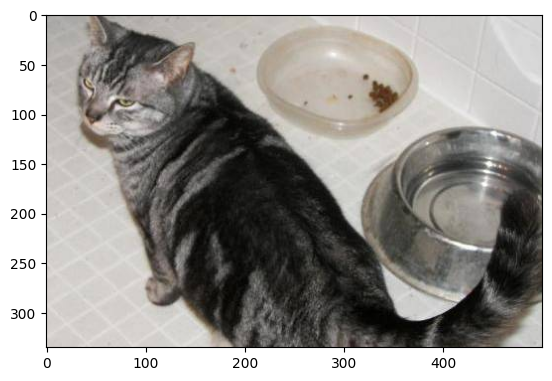

In [11]:
# displaying the cat image

img = mpimg.imread('/content/training_set/training_set/cats/'+train_cat_img[1])
plt.imshow(img)

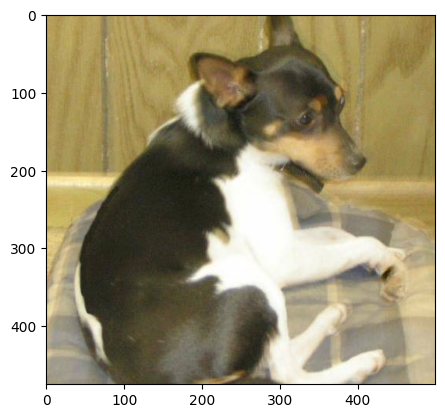

In [12]:
# displaying the dog image

img = mpimg.imread('/content/training_set/training_set/dogs/'+train_dog_img[-2])
plt.imshow(img)

**Image preprocessing**

1. Images resize

2. Converting images to numpy array


In [13]:
# train data

path_cat = '/content/training_set/training_set/cats/'
path_dog = '/content/training_set/training_set/dogs/'

X_train = []

for img_file in train_cat_img:
  image = Image.open(path_cat + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  X_train.append(image)

for img_file in train_dog_img:
  image = Image.open(path_dog + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  X_train.append(image)

In [14]:
# test data

path_cat = '/content/test_set/test_set/cats/'
path_dog = '/content/test_set/test_set/dogs/'

X_test = []

for img_file in test_cat_img:
  image = Image.open(path_cat + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  X_test.append(image)

for img_file in test_dog_img:
  image = Image.open(path_dog + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  X_test.append(image)

In [15]:
print(len(X_train))
print(len(X_test))

8005
2023


In [16]:
print(X_train[0].shape)
print(X_test[0].shape)

(128, 128, 3)
(128, 128, 3)


In [17]:
print(X_train[0])
print(X_test[0])

[[[216 242 242]
  [227 250 250]
  [224 251 248]
  ...
  [247  11  91]
  [245  13  90]
  [232  11  86]]

 [[193 242 236]
  [241 247 253]
  [234 242 246]
  ...
  [245   9  90]
  [242   9  86]
  [234   9  82]]

 [[202 248 244]
  [236 248 252]
  [231 246 247]
  ...
  [247  11  92]
  [242   8  85]
  [238   9  79]]

 ...

 [[234 214 197]
  [241 222 211]
  [239 222 212]
  ...
  [ 93  10  19]
  [ 88  12  21]
  [ 84  14  24]]

 [[232 215 195]
  [239 219 207]
  [239 218 208]
  ...
  [ 96  12  23]
  [ 91  17  26]
  [ 91  17  30]]

 [[229 213 196]
  [239 215 205]
  [241 216 208]
  ...
  [ 95  12  24]
  [ 87  12  24]
  [ 95  17  31]]]
[[[45 53 32]
  [44 52 31]
  [43 51 30]
  ...
  [54 56 35]
  [68 67 44]
  [66 61 38]]

 [[46 54 33]
  [45 53 32]
  [44 52 31]
  ...
  [58 60 39]
  [72 70 48]
  [58 53 31]]

 [[47 55 34]
  [46 54 33]
  [45 53 32]
  ...
  [70 71 50]
  [67 65 43]
  [63 58 35]]

 ...

 [[23 23 21]
  [22 22 20]
  [ 2  2  1]
  ...
  [89 73 76]
  [87 71 74]
  [85 69 72]]

 [[19 19 17]
  [17 1

In [18]:
print(type(X_train))
print(type(X_test))

<class 'list'>
<class 'list'>


In [19]:
# Converting image list and lable list into numpy array

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(train_lable)
y_test = np.array(test_lable)

In [20]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8005, 128, 128, 3)
(2023, 128, 128, 3)
(8005,)
(2023,)


In [22]:
# Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [23]:
print(X_train[0])

[[[216 242 242]
  [227 250 250]
  [224 251 248]
  ...
  [247  11  91]
  [245  13  90]
  [232  11  86]]

 [[193 242 236]
  [241 247 253]
  [234 242 246]
  ...
  [245   9  90]
  [242   9  86]
  [234   9  82]]

 [[202 248 244]
  [236 248 252]
  [231 246 247]
  ...
  [247  11  92]
  [242   8  85]
  [238   9  79]]

 ...

 [[234 214 197]
  [241 222 211]
  [239 222 212]
  ...
  [ 93  10  19]
  [ 88  12  21]
  [ 84  14  24]]

 [[232 215 195]
  [239 219 207]
  [239 218 208]
  ...
  [ 96  12  23]
  [ 91  17  26]
  [ 91  17  30]]

 [[229 213 196]
  [239 215 205]
  [241 216 208]
  ...
  [ 95  12  24]
  [ 87  12  24]
  [ 95  17  31]]]


In [24]:
print(X_train_scaled[0])

[[[0.84705882 0.94901961 0.94901961]
  [0.89019608 0.98039216 0.98039216]
  [0.87843137 0.98431373 0.97254902]
  ...
  [0.96862745 0.04313725 0.35686275]
  [0.96078431 0.05098039 0.35294118]
  [0.90980392 0.04313725 0.3372549 ]]

 [[0.75686275 0.94901961 0.9254902 ]
  [0.94509804 0.96862745 0.99215686]
  [0.91764706 0.94901961 0.96470588]
  ...
  [0.96078431 0.03529412 0.35294118]
  [0.94901961 0.03529412 0.3372549 ]
  [0.91764706 0.03529412 0.32156863]]

 [[0.79215686 0.97254902 0.95686275]
  [0.9254902  0.97254902 0.98823529]
  [0.90588235 0.96470588 0.96862745]
  ...
  [0.96862745 0.04313725 0.36078431]
  [0.94901961 0.03137255 0.33333333]
  [0.93333333 0.03529412 0.30980392]]

 ...

 [[0.91764706 0.83921569 0.77254902]
  [0.94509804 0.87058824 0.82745098]
  [0.9372549  0.87058824 0.83137255]
  ...
  [0.36470588 0.03921569 0.0745098 ]
  [0.34509804 0.04705882 0.08235294]
  [0.32941176 0.05490196 0.09411765]]

 [[0.90980392 0.84313725 0.76470588]
  [0.9372549  0.85882353 0.81176471]


**Building a Convolutional Neural Networks (CNN)**

In [25]:
import tensorflow as tf
from tensorflow import keras


In [26]:
number_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128 , activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64 , activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(number_of_classes , activation = 'sigmoid'))


In [27]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [28]:
history=model.fit(X_train_scaled, y_train,validation_split = 0.2 , epochs = 10 )

Epoch 1/10
201/201 [==============================] - 19s 30ms/step - loss: 0.6948 - accuracy: 0.6163 - val_loss: 0.8482 - val_accuracy: 0.0000e+00
Epoch 2/10
201/201 [==============================] - 5s 27ms/step - loss: 0.6311 - accuracy: 0.6398 - val_loss: 0.8956 - val_accuracy: 0.2355
Epoch 3/10
201/201 [==============================] - 5s 25ms/step - loss: 0.5855 - accuracy: 0.6922 - val_loss: 0.9849 - val_accuracy: 0.3167
Epoch 4/10
201/201 [==============================] - 4s 19ms/step - loss: 0.5136 - accuracy: 0.7564 - val_loss: 0.8440 - val_accuracy: 0.5759
Epoch 5/10
201/201 [==============================] - 4s 21ms/step - loss: 0.4354 - accuracy: 0.8065 - val_loss: 1.1959 - val_accuracy: 0.4235
Epoch 6/10
201/201 [==============================] - 4s 19ms/step - loss: 0.3483 - accuracy: 0.8534 - val_loss: 1.1211 - val_accuracy: 0.5490
Epoch 7/10
201/201 [==============================] - 4s 20ms/step - loss: 0.2658 - accuracy: 0.8927 - val_loss: 1.0044 - val_accuracy: 0

In [32]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test accuracy: ",accuracy)

64/64 [==============================] - 1s 8ms/step - loss: 1.0352 - accuracy: 0.7128
Test accuracy:  0.7128027677536011


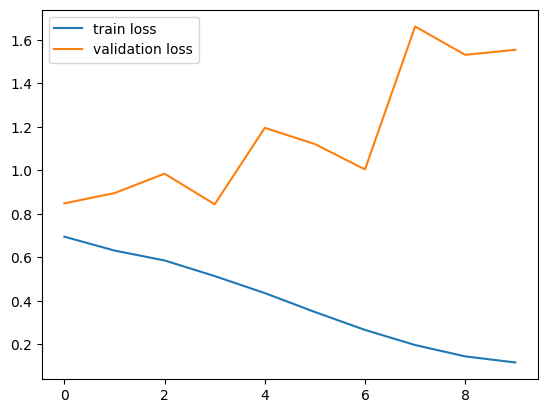

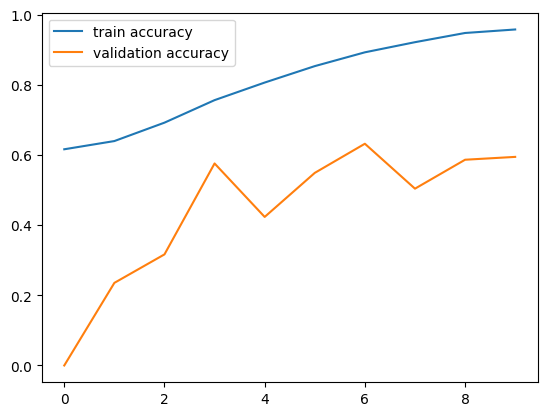

In [33]:
h = history

# plot the loss value

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

# plot the accuracy value

plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Give the path of the image: /content/test2.jpg


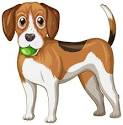

1/1 [==============================] - 0s 19ms/step
[[0.24519731 0.866203  ]] 1
Dog


In [42]:
input_img_path = input("Give the path of the image: ")

input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)

input_img_resized = cv2.resize(input_img,(128,128))

input_img_scaled = input_img_resized/255

input_img_reshaped = np.reshape(input_img_scaled, [1,128,128,3])

input_prediction = model.predict(input_img_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_prediction,input_pred_label)

if input_pred_label == 0:
  print('Cat')
else:
  print('Dog')

In [44]:
import pickle

In [45]:
pickle.dump(model,open('model.pkl','wb'))